<a href="https://colab.research.google.com/github/SAULIZA/prediccion_de_ventas/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIONES DE VENTAS Proyecto1- Parte3(base)**
## Creado por: Saúl Iza

* Fecha creado: 01/03/2023
* Fecha modificada: 01/03/2023
* Descripción: proyecto


In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [3]:
#manipulacion de base de datos
import pandas as pd
import numpy as np

#visualizacion
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Proyecto1-Parte1

In [4]:
filename ="/content/drive/MyDrive/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Proyecto1-Parte2

1) ¿Cuántas filas y columnas?

In [5]:
df.shape

(8523, 12)

El data frame tiene 8523 filas y 12 columnas

2) ¿Cuáles son los tipos de datos en cada variable?

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Se pueden observar que hay variables de tipo float y de tipo object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [7]:
df.duplicated().sum()

0

No existen duplicados

4) Identifiquen los valores faltantes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Existen valores faltantes en Item_Weight y Outlet_Size

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

5.1) Columna Item_Weight

In [9]:
#Primero trabajamnos en la columna Item weight (peso del artículo)
df["Item_Weight"].isna().sum()

1463

Existen 1463 datos faltantes, esta variable no se puede eliminar ya que es un porcentaje de datos pequeño que falta. Por otro lado no eliminaría esta columna ya que el peso puede ser una característica importante para analizar la logísitca.

In [10]:
# probablemente haya una correlación entre el peso y el tipo de artículo
df.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [11]:
df.groupby("Item_Type")["Item_Weight"].min()

Item_Type
Baking Goods             4.880
Breads                   4.635
Breakfast                6.425
Canned                   4.615
Dairy                    4.805
Frozen Foods             4.555
Fruits and Vegetables    5.460
Hard Drinks              4.610
Health and Hygiene       5.175
Household                5.030
Meat                     5.150
Others                   5.500
Seafood                  5.365
Snack Foods              5.095
Soft Drinks              4.590
Starchy Foods            6.695
Name: Item_Weight, dtype: float64

In [ ]:
df.groupby("Item_Type")["Item_Weight"].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

El peso del artículo no depende del tipo de artículo


In [12]:
df.groupby("Outlet_Type")["Item_Weight"].mean()

Outlet_Type
Grocery Store        12.913153
Supermarket Type1    12.849509
Supermarket Type2    12.873346
Supermarket Type3          NaN
Name: Item_Weight, dtype: float64

El peso del artículo tampoco depende del tipo de outlet. Además el supermercado 3 no ha registrado el peso de sus artículos

In [13]:
df.groupby("Outlet_Size")["Item_Weight"].mean()

Outlet_Size
High      13.006148
Medium    12.895420
Small     12.848075
Name: Item_Weight, dtype: float64

Debido a que no se encuentra una coorelación de la columna de peso de artículo con el resto de columnas, podríamos optar por rellenar los vacios con un promedio de peso.

In [14]:
mean_weight = df["Item_Weight"].mean()#calculo del promedio
df["Item_Weight"].fillna(mean_weight, inplace =True)# rellanamos los valores Na con el promedio
df.isna().sum() #comprobamos

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5.2) Columna Outlet_Size

In [15]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

No se puede ver una variable mayoritaria con respecto al tamaño del outlet

In [16]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

No hay correlación entre el tipo de ubicación y el tamaño del outlet

In [17]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
outl_size = ["Medium", "Small", "High"]
out = ["OUT027", "OUT013", "OUT049", "OUT046", "OUT035", "OUT045", "OUT018", "OUT017", "OUT010", "OUT019"]
for x in range(len(outl_size)):
  for y in range(len(out)):
    comun = (df["Outlet_Size"] == outl_size[x]) & (df["Outlet_Identifier"] == out[y])
    print("el tamaño de la tienda",outl_size[x], "con identificador",out[y], "tiene en comun", comun.sum())

el tamaño de la tienda Medium con identificador OUT027 tiene en comun 935
el tamaño de la tienda Medium con identificador OUT013 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT049 tiene en comun 930
el tamaño de la tienda Medium con identificador OUT046 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT035 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT045 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT018 tiene en comun 928
el tamaño de la tienda Medium con identificador OUT017 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT010 tiene en comun 0
el tamaño de la tienda Medium con identificador OUT019 tiene en comun 0
el tamaño de la tienda Small con identificador OUT027 tiene en comun 0
el tamaño de la tienda Small con identificador OUT013 tiene en comun 0
el tamaño de la tienda Small con identificador OUT049 tiene en comun 0
el tamaño de la tienda Small con identificador OUT046 tiene e

No existe una correlación entre el tamaño del outlet y el identificador del outlet

In [ ]:
outl_size = ["Medium", "Small", "High"]
out_loc_t = ["Tier 1", "Tier 2", "Tier 3"]
for x in range(len(outl_size)):
  for y in range(len(out_loc_t)):
    comun1 = (df["Outlet_Size"] == outl_size[x]) & (df["Outlet_Location_Type"] == out_loc_t[y])
    print("el tamaño de la tienda",outl_size[x], "con tipo de locacion",out_loc_t[y], "tiene en comun", comun1.sum())

el tamaño de la tienda Medium con tipo de locacion Tier 1 tiene en comun 930
el tamaño de la tienda Medium con tipo de locacion Tier 2 tiene en comun 0
el tamaño de la tienda Medium con tipo de locacion Tier 3 tiene en comun 1863
el tamaño de la tienda Small con tipo de locacion Tier 1 tiene en comun 1458
el tamaño de la tienda Small con tipo de locacion Tier 2 tiene en comun 930
el tamaño de la tienda Small con tipo de locacion Tier 3 tiene en comun 0
el tamaño de la tienda High con tipo de locacion Tier 1 tiene en comun 0
el tamaño de la tienda High con tipo de locacion Tier 2 tiene en comun 0
el tamaño de la tienda High con tipo de locacion Tier 3 tiene en comun 932


In [18]:
df.groupby("Outlet_Size")["Item_Outlet_Sales"].mean() # veamos si hay una relación entre el tamaño de la tienda y las ganancias de ventas


Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

tampoco hay una correlación entre el tamaño del outlet y las ventas

Debido a que no se encuentran correlación alguna, y no hay una tendencia en la variable tamaño del outlet, podríamos eliminarla, además esta característica pienso que no es importante a la hora de predecir las ventas.

In [19]:
df.drop(columns="Outlet_Size", inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [20]:
#confirmamos que no hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [21]:
df["Item_Fat_Content"].value_counts() #cantidad de valores en contenido de grasa

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Se observan categorías inconsistentes, en la variable de contenido de grasa. Supondremos que Low Fat es igual que LF y también a low fat, además que Regular es igual que reg.

In [22]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")

In [23]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [24]:
#Una columna que me parece muy interesante de analizar son las ventas
df["Item_Outlet_Sales"].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

El promedio de las ventas es de 2181.29 dólares, pero los datso de ventas son bastante dispersos, ya que se puede ver una desviación estandar de 1706,5

# Proyecto1-Parte3

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

1.- Variables categóricas

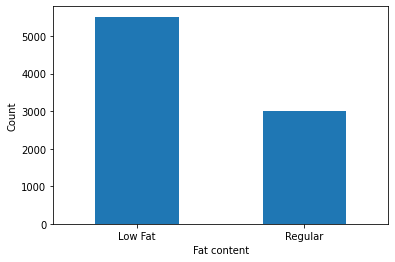

In [ ]:
df["Item_Fat_Content"].value_counts().plot(kind="bar")#grafico de barras del contenido de grasa
plt.xlabel("Fat content")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Del gráfico de barras del contenido de grasa de los productos podemos ver que hay una gran oferta de productos de contenido bajo en grasa

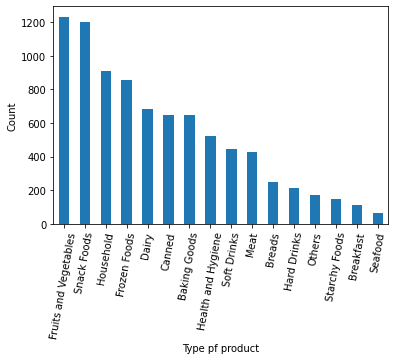

In [ ]:
df["Item_Type"].value_counts().plot(kind="bar")
plt.xlabel("Type pf product")
plt.xticks(rotation=80)
plt.ylabel("Count")
plt.show()

Las frutas y vegetales, así como los bocaditos son los productos que mas se ofrecen.

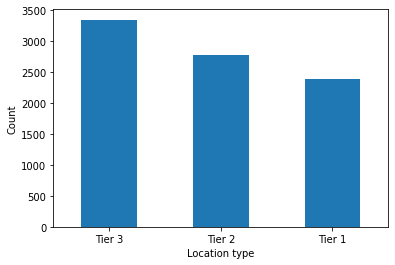

In [ ]:
df["Outlet_Location_Type"].value_counts().plot(kind="bar")
plt.xlabel("Location type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Del gráfico se puede observar que la mayoría de productos se encuentran en tiendas con tipo de localización 3

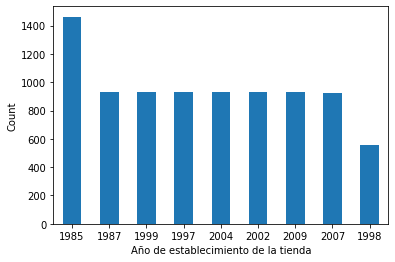

In [ ]:
df["Outlet_Establishment_Year"].value_counts().plot(kind="bar")
plt.xlabel("Año de establecimiento de la tienda")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

El gráfico nos indica que la mayoría de productos se ofrecen en la tienda que se estableció en 1985 (la primera tienda).
Pocos productos se ofrecen en la tienda que se estableció en 1998.

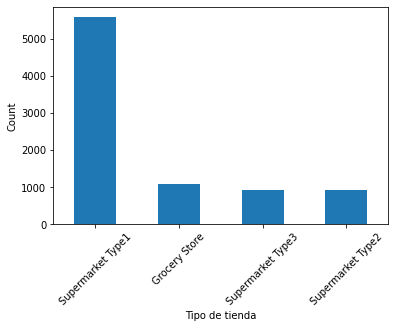

In [ ]:
df["Outlet_Type"].value_counts().plot(kind="bar")
plt.xlabel("Tipo de tienda")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Esto nos indica que hay una gran cantidad de productos que se ofrecen en supermercados de tipo 1.

2.- Variables numéricas

Histogramas

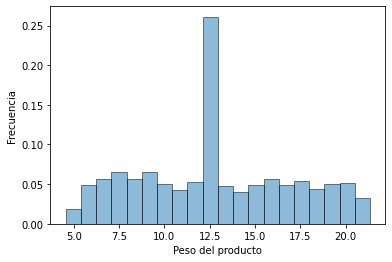

In [ ]:
plt.hist(df["Item_Weight"], bins=20, edgecolor = "black", density=True, alpha = 0.5)
plt.xlabel("Peso del producto")
plt.ylabel("Frecuencia")
plt.show()

Se ve que hay una gran cantidad de productos al rededor de 12.5 en peso, esto se debe a que los espacios vacíos en la variable peso del producto se rellenó con la media. De no haber hecho esto, se tendría una distribución más o menos uniforme.

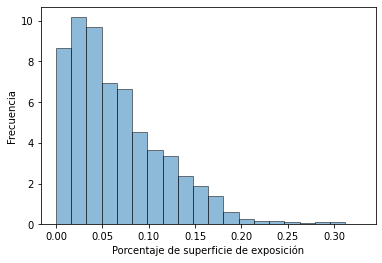

In [ ]:
plt.hist(df["Item_Visibility"], bins=20, edgecolor = "black", density=True, alpha = 0.5)
plt.xlabel("Porcentaje de superficie de exposición")
plt.ylabel("Frecuencia")
plt.show()

Los datos de visibilidad tienen un sesgo hacia la derecha. La mayoría de datos tienen un porcentaje de visibilidad pequeño.

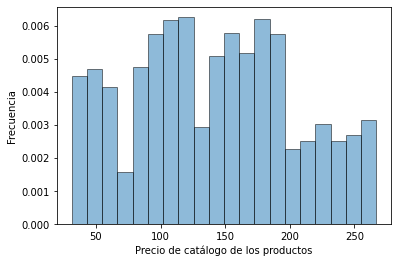

In [ ]:
plt.hist(df["Item_MRP"], bins=20, edgecolor = "black", density=True, alpha = 0.5)
plt.xlabel("Precio de catálogo de los productos")
plt.ylabel("Frecuencia")
plt.show()

La mayoría de productos tienen un precio alrededor de 50 y 200 dólares. La distribución de precios es mas o menos uniforme.

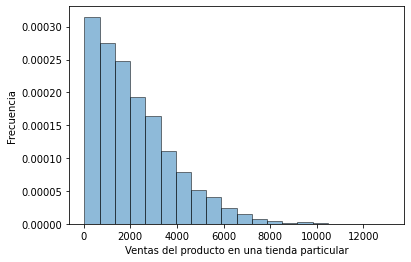

In [ ]:
plt.hist(df["Item_Outlet_Sales"], bins=20, edgecolor = "black", density=True, alpha = 0.5)
plt.xlabel("Ventas del producto en una tienda particular")
plt.ylabel("Frecuencia")
plt.show()


Los datos de ventas del productos tienen un sesgo positivo. Aquí podemos ver que hay pocos productos cuyas ventas son muy buenas y nos dan un ingreso importante. Mientras que hay muchos productos cuyas ventas no son muy buenas.

Boxplots

Me parece interesante analizar los datos de las ventas por contenido de grasa

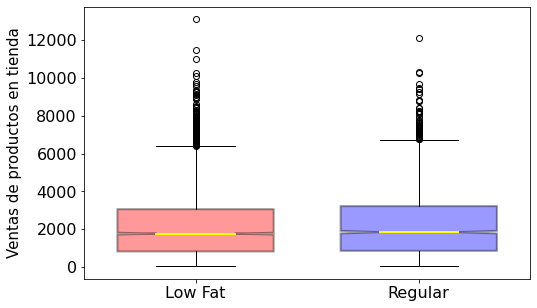

In [ ]:
low_fat = df.loc[df["Item_Fat_Content"] == "Low Fat","Item_Outlet_Sales"] 
regular = df.loc[df["Item_Fat_Content"] == "Regular", "Item_Outlet_Sales"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([low_fat, regular],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Ventas de productos en tienda', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Se puede observar que los datos de ventas dependiendo del contenido de grasa son muy parecidos, pero en los productos de bajo contenido de grasa se pueden observar que hay valores atípicos de mayor valor.

Me parece interesante también ver gráficos de caja de las ventas por tipo de locación

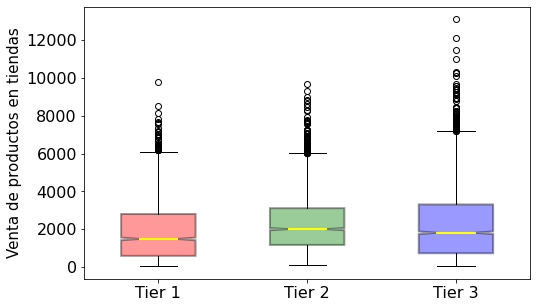

In [ ]:
tier_1 = df.loc[df["Outlet_Location_Type"] == "Tier 1","Item_Outlet_Sales"] 
tier_2 = df.loc[df["Outlet_Location_Type"] == "Tier 2", "Item_Outlet_Sales"]
tier_3 = df.loc[df["Outlet_Location_Type"] == "Tier 3", "Item_Outlet_Sales"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([tier_1, tier_2, tier_3],
           notch = True,
           labels=['Tier 1', 'Tier 2', 'Tier 3'],
           widths = .5,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('green')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Venta de productos en tiendas', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Se puede observar que los datos de ventas de las tiendas localizadas en locaciones de tipo 2 son menos dispersos, mientras que los datos de ventas de las tiendas localizadas en locaciones de tipo 3 son más dispersos. También se pueden observar valores atípicos mayores en las tiendas localizadas en locaciones tipo 3.

También me parece interesante ver los gráficos de cajas de los datos de ventas por tipo de tienda.

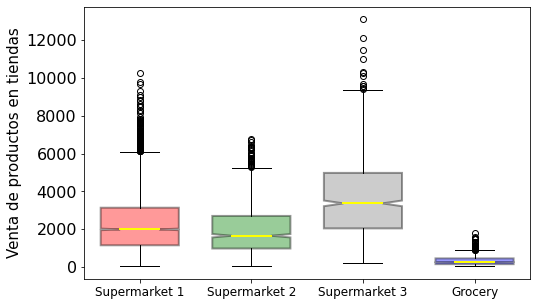

In [ ]:
super_1 = df.loc[df["Outlet_Type"] == "Supermarket Type1","Item_Outlet_Sales"] 
super_2 = df.loc[df["Outlet_Type"] == "Supermarket Type2", "Item_Outlet_Sales"]
super_3 = df.loc[df["Outlet_Type"] == "Supermarket Type3", "Item_Outlet_Sales"]
grocery = df.loc[df["Outlet_Type"] == "Grocery Store", "Item_Outlet_Sales"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([super_1, super_2, super_3, grocery],
           notch = True,
           labels=['Supermarket 1', 'Supermarket 2', 'Supermarket 3', 'Grocery'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('green')
boxplot2 = boxplots['boxes'][2]
boxplot2.set_facecolor('grey')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Venta de productos en tiendas', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 16);

Se puede observar que los 3 tipos de supermercados tienen datos de ventas sesagadas positivamente. Los datos de ventas de los grocery stores están menos dispersos y sus valores son de los más bajos en comparación con el resto de tipo de tiendas. Los datos de ventas del supermercado tipo 3 son de los más dispersos del grupo. El tercer y primer cuartil de los datos del supermercado tipo 3 se encuentra dentro de las ventas más altas de productos, es decir, un gran porcentaje de sus productos generan las más altas ventas.

mapa de calor

Se puede observar una correlación muy buena entre las ventas de los productos y el precio del catálogo del producto. Este resultado es un poco lógico, ya que los productos cuyos costos son altos, también van a registrar ventas altas.

<AxesSubplot:>

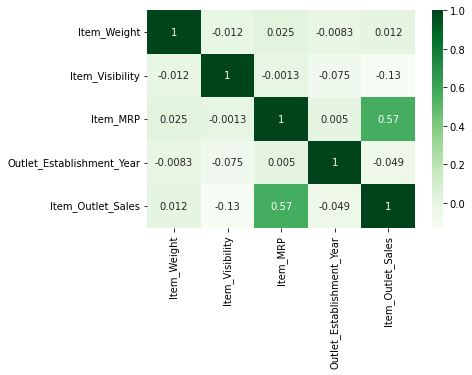

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

# Proyecto1-Parte 4 

Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.
* Aprovechen sus limpiezas, exploraciones y análisis anteriores.
* Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).
* Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
df['Item_Weight'].max()

21.35

In [ ]:
plt.style.use('seaborn')

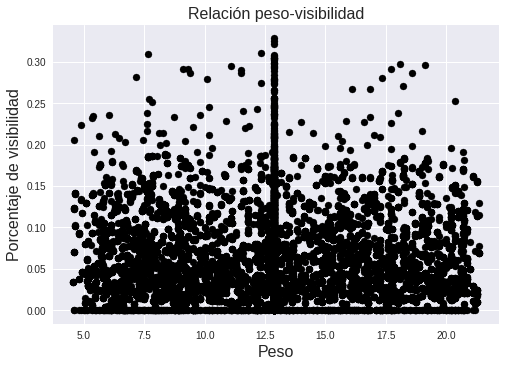

In [ ]:
#gráfico de visibilidad vs peso de un producto
visibilidad = np.array(df["Item_Visibility"].values)
peso = np.array(df["Item_Weight"].values)
plt.scatter(peso, visibilidad, c= 'k')
plt.title("Relación peso-visibilidad", fontsize=16)
plt.xlabel("Peso", fontsize=16)
plt.ylabel("Porcentaje de visibilidad", fontsize=16);

Se realizó un gráfico de peso vs porcentaje de visibilidad, solo por curiosidad. Y se puede observar que no existe una relación entre estas dos características.

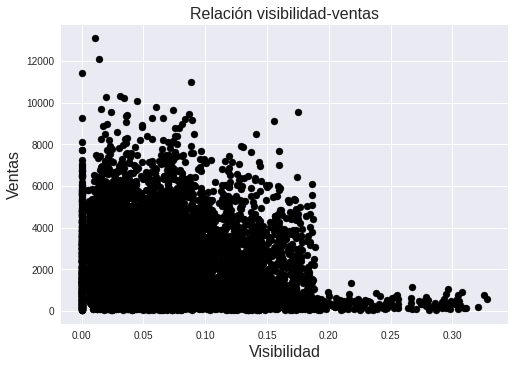

In [ ]:
#gráfico de visibilidad vs venta de producto
visibilidad = np.array(df["Item_Visibility"].values)
ventas = np.array(df["Item_Outlet_Sales"].values)

plt.scatter(visibilidad, ventas, c= 'k')
plt.title("Relación visibilidad-ventas", fontsize=16)
plt.xlabel("Visibilidad", fontsize=16)
plt.ylabel("Ventas", fontsize=16);

Se puede ver una relación inversa entre la visibilidad y las ventas, pero es una tendencia leve, esto también se puede ver el gráfico de calor presentado anteriormente. 

In [ ]:
clasif_location_type_outlet_sales = df.groupby(["Outlet_Location_Type","Outlet_Type","Outlet_Identifier"])["Item_Outlet_Sales"].mean()

In [ ]:
clasif_location_type_outlet_sales = pd.DataFrame(clasif_location_type_outlet_sales)

In [ ]:
df1 = clasif_location_type_outlet_sales.reset_index()
df1

,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Item_Outlet_Sales
0,Tier 1,Grocery Store,OUT019,340.329723
1,Tier 1,Supermarket Type1,OUT046,2277.844267
2,Tier 1,Supermarket Type1,OUT049,2348.354635
3,Tier 2,Supermarket Type1,OUT017,2340.675263
4,Tier 2,Supermarket Type1,OUT035,2438.841866
5,Tier 2,Supermarket Type1,OUT045,2192.384798
6,Tier 3,Grocery Store,OUT010,339.351662
7,Tier 3,Supermarket Type1,OUT013,2298.995256
8,Tier 3,Supermarket Type2,OUT018,1995.498739
9,Tier 3,Supermarket Type3,OUT027,3694.038558


In [ ]:
identificador = np.array(df1["Outlet_Identifier"].index)
prom_ventas = np.array(df1["Item_Outlet_Sales"].values)

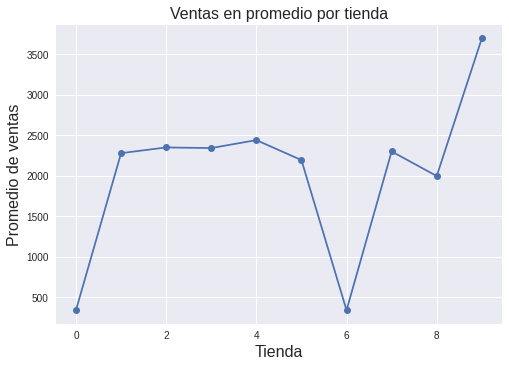

In [ ]:
plt.plot(identificador, prom_ventas, marker = "o")

plt.title("Ventas en promedio por tienda", fontsize=16)
plt.xlabel("Tienda", fontsize=16)
plt.ylabel("Promedio de ventas", fontsize=16);

Se puede observar que las tiendas de tipo Grocery (OUT019 y OUT010)son las que menor promedio de ventas registran. Y la tienda que registra el mejor promedio de ventas es la tienda de tipo supermercado 3 (OUT027). El resto de tiendas se encuentran en un nivel intermedio.

In [28]:
clasif_outlet_fat_sales = df.groupby(["Outlet_Identifier","Item_Fat_Content"])["Item_Outlet_Sales"].mean()
clasif_outlet_fat_sales = pd.DataFrame(clasif_outlet_fat_sales)
df2 = clasif_outlet_fat_sales.reset_index()
bajo_en_grasa = df2.loc[df2["Item_Fat_Content"] == "Low Fat",:]
regular_en_grasa = df2.loc[df2["Item_Fat_Content"] == "Regular",:]

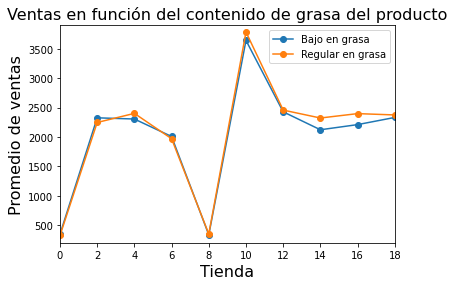

In [44]:
plt.plot(bajo_en_grasa["Outlet_Identifier"].index,bajo_en_grasa["Item_Outlet_Sales"].values , marker = "o", label ="Bajo en grasa")
plt.plot(bajo_en_grasa["Outlet_Identifier"].index,regular_en_grasa["Item_Outlet_Sales"].values , marker = "o", label ="Regular en grasa")

plt.title("Ventas en función del contenido de grasa del producto", fontsize=16)
plt.xlabel("Tienda", fontsize=16)
plt.xlim(left = 0, right=18) #limites
plt.ylim(bottom=200, top=3900)
plt.ylabel("Promedio de ventas", fontsize=16);
plt.legend();

Este gráfico nos indican el promedio de ventas por tienda de los productos con contenido regular y bajo en grasa. Se puede observar que las ventas (en promedio) no dependen de la cantidad de contenido de grasa en las distintas tiendas, nada más difieren en las tiendas OUT013 y OUT018, donde las ventas (en promedio) de los productos con contenido regular en grasa son ligeramente mayores.